In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import math
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

a4_dims = (11.7, 8.27)
sns.set(font_scale = 2)

In [113]:
fa_17 = pd.read_csv("UD75 v2\Fa17UD75_v2_hashed.csv")
sp_18 = pd.read_csv("UD75 v2\Sp18UD75_v2_hashed.csv")
fa_18 = pd.read_csv("UD75 v2\Fa18UD75_v2_hashed.csv")
sp_19 = pd.read_csv("UD75 v2\Sp19UD75_v2_hashed.csv")
fa_19 = pd.read_csv("UD75 v2\Fa19UD75_v2_hashed.csv")

ad_sp_su_17_cc = pd.read_csv('Advising Data\SpSu17CC_hashed.csv')

ad_fa_17_cc = pd.read_csv('Advising Data\Fa17CC_hashed.csv')
ad_fa_17_di = pd.read_csv('Advising Data\Fa17DI_hashed.csv')

ad_su_18_di = pd.read_csv('Advising Data\Su18DI_hashed.csv')
ad_sp_18_di = pd.read_csv('Advising Data\Sp18DI_hashed.csv')

ad_fa_18_di = pd.read_csv('Advising Data\Fa18DI_hashed.csv')

ad_sp_19_di = pd.read_csv('Advising Data\Sp19DI_hashed.csv')

ad_su_19_di = pd.read_csv('Advising Data\Su19DI_hashed.csv')
ad_su_fa_19_ycbm = pd.read_csv('Advising Data\SuFa19YCBM_hashed.csv')

ad_fa_19_di = pd.read_csv('Advising Data\Fa19DI_hashed.csv')

In [114]:
ad_sp_19_di

,Unnamed: 0,Date,Check-in,SID,Reason,Adviser,Pick-up,Unnamed: 6,Unnamed: 7
0,0,2019-01-02,13:00:00,a8c690117dcff477a4f5b0340da320b4595fa2a73237c0...,"*for Heidi, graduation requirements",Heidi,13:10:00,NaN,NaN
1,1,2019-01-02,13:01:00,ca40919311aae31ebef7b2facc810720e90d527972542a...,degree check,Jhovany,13:05:00,NaN,NaN
2,2,2019-01-02,13:02:00,69eb67abcfeb014e68e362875d173c39dce81b94811908...,degree check,Greg,13:05:00,NaN,NaN
3,3,2019-01-02,13:03:00,1767362739b6b887f873ae31e1d5274e02c3bc8206d86e...,degree check,Amy,13:16:00,NaN,NaN
4,4,2019-01-02,13:03:00,1fd82ab1e3df2a54d2097319d82785ea5a9e801bb79311...,readmission/ SAP appeal,Heidi,13:40:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3872,3872,2019-05-17,14:16:00,7bf8ac19ac477ecff5760fe29d363f9ae8037174d8f453...,RCL for international student,Anay,15:15:00,NaN,NaN
3873,3873,2019-05-17,14:18:00,dadfc8370373319bc2e322f0a288890307dfee62ed1b64...,"*Jhovany, exchange program follow up",Jhovany,NO SHOW,NaN,NaN
3874,3874,2019-05-17,15:10:00,98344fce6435996c309d8f85a86f663b7ca0c6349d39c4...,Regarding a class,Sonya,15:13:00,NaN,NaN
3875,3875,2019-05-17,15:35:00,01bbaa7cb1adcd6a20aa94bd78124ce82171e42cc1b1ac...,Incomplete/ Options,Charles,15:40:00,NaN,NaN


## Some preliminary cleaning

In [115]:
fa_17_unq = fa_17.drop_duplicates(subset = ["SID"])
sp_18_unq = sp_18.drop_duplicates(subset = ["SID"])
fa_18_unq = fa_18.drop_duplicates(subset = ["SID"])
sp_19_unq = sp_19.drop_duplicates(subset = ["SID"])
fa_19_unq = fa_19.drop_duplicates(subset = ["SID"])

fa_17_unq['_'] = ['FA17'] * fa_17_unq.shape[0]
sp_18_unq['_'] = ['SP18'] * sp_18_unq.shape[0]
fa_18_unq['_'] = ['FA18'] * fa_18_unq.shape[0]
sp_19_unq['_'] = ['SP19'] * sp_19_unq.shape[0]
fa_19_unq['_'] = ['FA19'] * fa_19_unq.shape[0]

# Comparing Entry Status & Educ Level of students who visited advising.

### Assumptions and Important Comments

- For Fall 17, we use advising data from Spring 17, Summer 17 and Fall 17
- For Fall 18, we use advising data from Summer 18 and Fall 18.
- For Fall 19, we use advising data from Summer 19 and Fall 19.

In [116]:
fa_17_unq['Attended Advising Appt'] = [((n in list(ad_sp_su_17_cc['SID'])) or (n in list(ad_fa_17_cc['SID'])) or (n in list(ad_fa_17_di['SID']))) for n in fa_17_unq['SID']]
sp_18_unq['Attended Advising Appt'] = [(n in list(ad_sp_18_di['SID'])) for n in sp_18_unq['SID']]
fa_18_unq['Attended Advising Appt'] = [((n in list(ad_fa_18_di['SID'])) or (n in list(ad_su_18_di['SID']))) for n in fa_18_unq['SID']]
sp_19_unq['Attended Advising Appt'] = [(n in list(ad_sp_19_di['SID'])) for n in sp_19_unq['SID']]
fa_19_unq['Attended Advising Appt'] = [((n in list(ad_su_18_di['SID'])) or (n in list(ad_su_fa_19_ycbm['SID'])) or (n in list(ad_fa_19_di['SID']))) for n in fa_19_unq['SID']]

In [117]:
all_data_unq = [fa_17_unq, sp_18_unq, fa_18_unq, sp_19_unq, fa_19_unq]
entry_counts_df = pd.DataFrame(columns = ['Term', 'Entry', 'Count', 'Pct'])
i = 0

for df in all_data_unq:
    full_nf_count = df[df['Entry Status Cd'] == 'NF'].shape[0]
    nf_count = np.count_nonzero(df[df['Entry Status Cd'] == 'NF']['Attended Advising Appt'])
    full_ad_count = df[df['Entry Status Cd'] == 'AD'].shape[0]
    ad_count = np.count_nonzero(df[df['Entry Status Cd'] == 'AD']['Attended Advising Appt'])
    
    entry_counts_df.loc[i] = [df.loc[0, '_'], 'NF', nf_count, 100 * (nf_count/full_nf_count)]
    i += 1
    entry_counts_df.loc[i] = [df.loc[0, '_'], 'AD', ad_count, 100 * (ad_count/full_ad_count)]
    i += 1

In [118]:
entry_counts_df

,Term,Entry,Count,Pct
0,FA17,NF,501,47.578348
1,FA17,AD,457,34.181002
2,SP18,NF,135,17.197452
3,SP18,AD,186,27.719821
4,FA18,NF,221,19.981917
5,FA18,AD,117,43.656716
6,SP19,NF,0,0.000000
7,SP19,AD,0,0.000000
8,FA19,NF,246,23.495702
9,FA19,AD,127,43.642612


In [119]:
np.count_nonzero(ad_sp_19_di['SID'].isin(list(fa_17_unq['SID'])))

0

In [120]:
np.count_nonzero(ad_sp_19_di['SID'].isin(list(sp_19_unq['SID'])))

0

In [121]:
sp_19_unq

,Unnamed: 0,SID,Include Sb Week Desc,Withdrawal Reason Eff Dt,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Total Units Less Exam No,Cum Transfer Units No,...,Cum Pnp Units No,Cum Total Incomplete No,Term Letgrd Units Attempted No,Eot Term Letgrd Units Complete,Eot Trm Tot Letgrd Grd Pnts No,Eot Term Pnp Units Completed,Term Total Units Attempted No,Eot Term Total Units Completed,_,Attended Advising Appt
0,0,81b3a8c2fec32350f316d5885a84f97e3ddd50019353e4...,CEN,NaN,AD,1,L&S Undeclared,3.133,66.0,53.0,...,1.0,0,14.0,NaN,NaN,NaN,14.0,NaN,SP19,False
2,2,2dab3f668525d749f893bffbdd663b2bbf872525b8691b...,CEN,NaN,AD,3,L&S Undeclared,1.909,78.0,67.0,...,71.0,0,16.0,NaN,NaN,NaN,16.0,NaN,SP19,False
4,4,f2751edfb91c88e7d8d4554460778dbab4b035afdd66ae...,CEN,NaN,AD,2,L&S Undeclared,2.624,104.0,70.0,...,13.0,0,8.0,NaN,NaN,NaN,8.0,NaN,SP19,False
6,6,43ebc54ce244f1e20063c73b4007e641416d78a1ae9c5b...,CEN,NaN,NF,4,L&S Undeclared,2.795,116.0,16.0,...,12.0,0,11.0,NaN,NaN,NaN,13.0,NaN,SP19,False
8,8,3779363bb94f9a14b9df6b147236b9bc50901dbaf322fb...,CEN,NaN,NF,4,L&S Undeclared,2.507,119.0,37.0,...,15.0,0,7.0,NaN,NaN,NaN,7.0,NaN,SP19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2821,15a86ab14081d09bb6c68b2c619369c481472f4adc47fa...,CEN,NaN,NF,1,L&S Undeclared,4.000,65.0,44.0,...,5.0,0,12.0,NaN,NaN,NaN,13.0,NaN,SP19,False
2823,2823,cada315cd568caf3b68e5ea809701194adec190c271ae3...,CEN,NaN,AD,2,L&S Undeclared,2.700,61.0,46.0,...,3.0,0,12.0,NaN,NaN,NaN,14.0,NaN,SP19,False
2825,2825,01e514b06c4c537012ff69726206155174d67ddb2985af...,CEN,NaN,AD,3,L&S Undeclared,3.080,73.0,57.0,...,6.0,0,15.0,NaN,NaN,NaN,15.0,NaN,SP19,False
2827,2827,3f52c237c241c531226e34cdd17a08cff5768c5ed4d505...,CEN,NaN,AD,2,L&S Undeclared,2.081,75.0,62.0,...,2.0,0,12.0,NaN,NaN,NaN,14.0,NaN,SP19,False


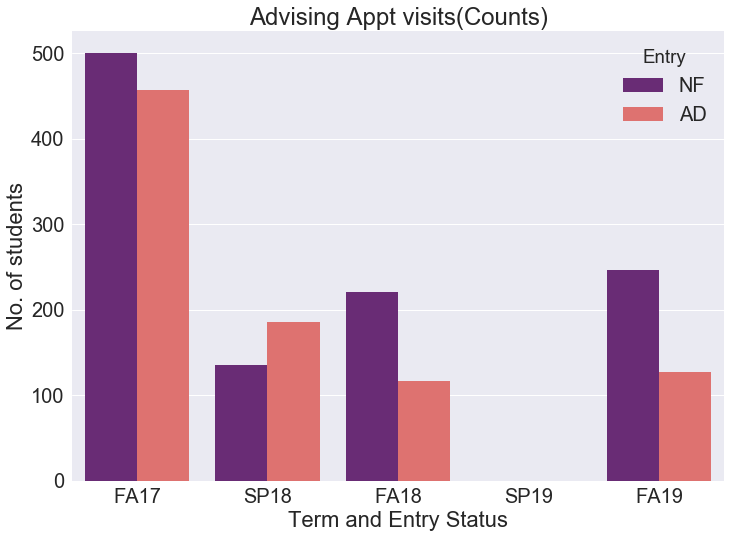

In [122]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'Term', y = 'Count', hue = 'Entry', data = entry_counts_df, palette = 'magma')
ax.set(xlabel='Term and Entry Status', ylabel='No. of students', title = 'Advising Appt visits(Counts)')
ax.figure.savefig("plots\\ad_visits_by_entry_counts.png")
pyplot.show()

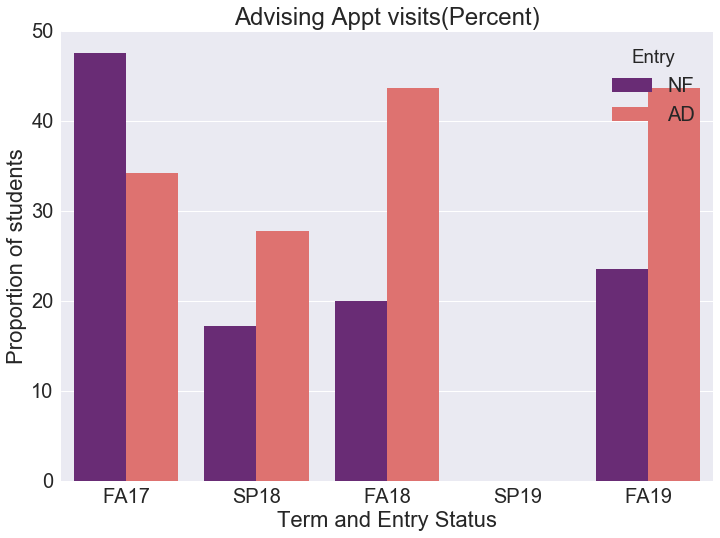

In [123]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'Term', y = 'Pct', hue = 'Entry', data = entry_counts_df, palette = 'magma')
ax.set(xlabel='Term and Entry Status', ylabel='Proportion of students', title = 'Advising Appt visits(Percent)')
ax.figure.savefig("plots\\ad_visits_by_entry_percent.png")
pyplot.show()

In [124]:
edu_counts_df = pd.DataFrame(columns = ['Term', 'Educ', 'Count', 'Pct'])
i = 0

for df in all_data_unq:
    full_count_1 = df[df['Educ Non Exam Level Cd'] == '1'].shape[0]
    count_1 = np.count_nonzero(df[df['Educ Non Exam Level Cd'] == '1']['Attended Advising Appt'])
    full_count_2 = df[df['Educ Non Exam Level Cd'] == '2'].shape[0]
    count_2 = np.count_nonzero(df[df['Educ Non Exam Level Cd'] == '2']['Attended Advising Appt'])
    full_count_3 = df[df['Educ Non Exam Level Cd'] == '3'].shape[0]
    count_3 = np.count_nonzero(df[df['Educ Non Exam Level Cd'] == '3']['Attended Advising Appt'])
    full_count_4 = df[df['Educ Non Exam Level Cd'] == '4'].shape[0]
    count_4 = np.count_nonzero(df[df['Educ Non Exam Level Cd'] == '4']['Attended Advising Appt'])
    
    edu_counts_df.loc[i] = [df.loc[0, '_'], '1', count_1, 100 * (count_1/full_count_1)]
    i += 1
    edu_counts_df.loc[i] = [df.loc[0, '_'], '2', count_2, 100 * (count_2/full_count_2)]
    i += 1
    edu_counts_df.loc[i] = [df.loc[0, '_'], '3', count_3, 100 * (count_3/full_count_3)]
    i += 1
    edu_counts_df.loc[i] = [df.loc[0, '_'], '4', count_4, 100 * (count_4/full_count_4)]
    i += 1

In [125]:
edu_counts_df

,Term,Educ,Count,Pct
0,FA17,1,12,32.432432
1,FA17,2,54,50.000000
2,FA17,3,702,36.524454
3,FA17,4,190,58.823529
4,SP18,1,7,14.000000
5,SP18,2,18,7.058824
6,SP18,3,232,23.458038
7,SP18,4,64,39.506173
8,FA18,1,4,33.333333
9,FA18,2,24,18.320611


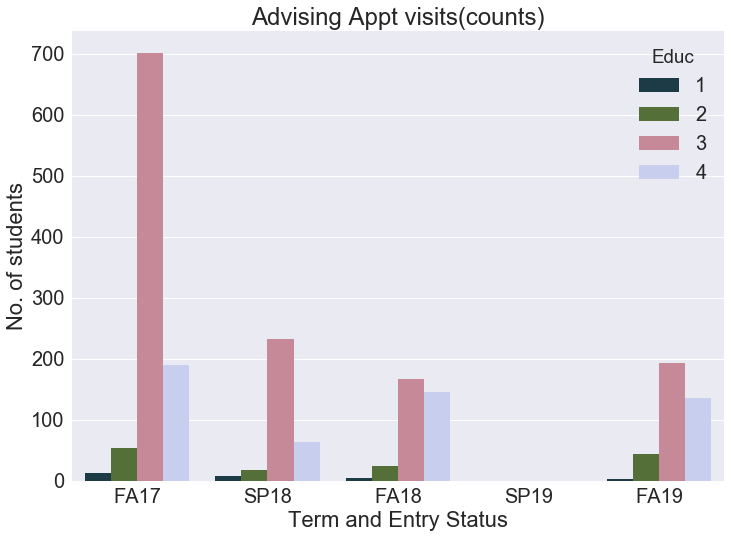

In [126]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'Term', y = 'Count', hue = 'Educ', data = edu_counts_df, palette = 'cubehelix')
ax.set(xlabel='Term and Entry Status', ylabel='No. of students', title = 'Advising Appt visits(counts)')
ax.figure.savefig("plots\\ad_visits_by_edu_counts.png")
pyplot.show()

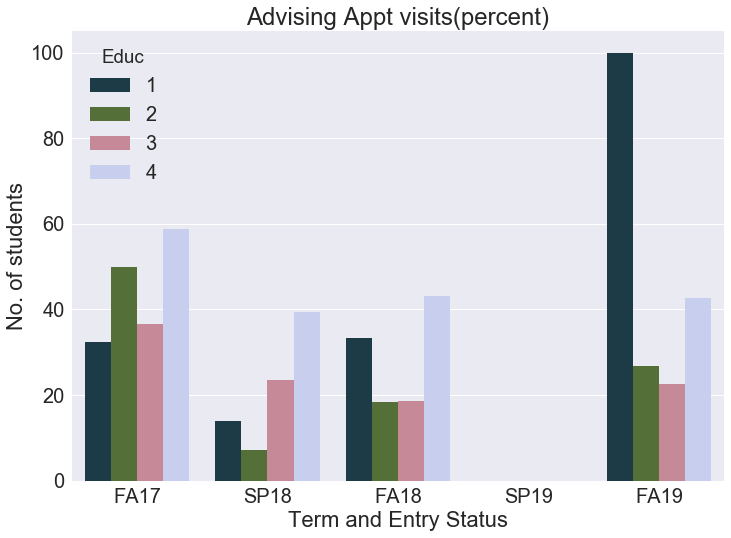

In [127]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'Term', y = 'Pct', hue = 'Educ', data = edu_counts_df, palette = 'cubehelix')
ax.set(xlabel='Term and Entry Status', ylabel='No. of students', title = 'Advising Appt visits(percent)')
ax.figure.savefig("plots\\ad_visits_by_edu_percent.png")
pyplot.show()

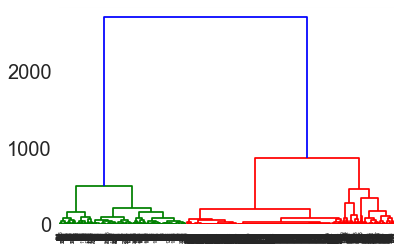

In [129]:
dendrogram = sch.dendrogram(sch.linkage(fa_17_unq.iloc[:,[7, 8, 9, 10]], method='ward'))
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(fa_17_unq.iloc[:,[7, 8, 9, 10]])

In [95]:
fa_17_unq['cluster'] = y_hc